In [14]:
import pandas as pd
import numpy as np

In [15]:
acc = pd.read_csv('processed_data/acc.csv')
eda = pd.read_csv('processed_data/eda.csv')
hr = pd.read_csv('processed_data/hr.csv')
temp = pd.read_csv('processed_data/temp.csv')
grades = pd.read_csv('processed_data/grades.csv')

In [16]:
def append_df_name(df, df_name):
    df.columns = [f"{col}_{df_name}" for col in df.columns]

In [17]:
append_df_name(acc, 'acc')
append_df_name(eda, 'eda')
append_df_name(hr, 'hr')
append_df_name(temp, 'temp')

In [24]:
merged_df = pd.concat([acc.iloc[:, 1:4], eda.iloc[:, 1:4], hr.iloc[:, 1:4], temp.iloc[:, 1:4], grades], axis=1)
merged_df.set_index('Name', inplace=True)
merged_df.head()

,1-One Third (During)_acc,2-Two Third (During)_acc,3-Three Third (During)_acc,1-One Third (During)_eda,2-Two Third (During)_eda,3-Three Third (During)_eda,1-One Third (During)_hr,2-Two Third (During)_hr,3-Three Third (During)_hr,1-One Third (During)_temp,2-Two Third (During)_temp,3-Three Third (During)_temp,Percentage_Score
Name,,,,,,,,,,,,,
S1_Final,9.924574,9.931743,9.968197,0.175449,0.193167,0.194140,97.257044,91.072486,91.932128,30.733272,29.738756,29.253211,0.91
S1_Midterm 1,9.884318,10.028550,9.954050,0.023815,0.191496,1.353150,123.298956,123.649339,81.888633,23.151044,24.106900,28.129944,0.78
S1_Midterm 2,9.923845,9.917446,9.924282,0.200613,0.190540,0.203806,96.655489,102.290339,102.915378,29.410989,32.160333,32.528011,0.82
S2_Final,9.820483,9.764696,9.799434,0.139136,0.120121,0.165542,108.004592,106.531633,100.037369,33.626258,35.745414,35.479914,0.90
S2_Midterm 1,9.773319,9.799379,9.462331,0.011492,0.068991,0.447619,142.095233,145.844156,91.688439,23.260833,23.355889,28.903811,0.82


In [73]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns='Percentage_Score')
y = merged_df['Percentage_Score'] * 100

# Select features to transform (e.g., 'X1' and 'X3')
selected_features = ['1-One Third (During)_eda', '2-Two Third (During)_eda', '3-Three Third (During)_eda']
poly = PolynomialFeatures(degree=2, include_bias=False)

# Apply polynomial transformation only to selected features
X_selected_poly = poly.fit_transform(X[selected_features])  # This returns quadratic terms for X1 and X3

# Convert back to DataFrame with meaningful column names
poly_feature_names = poly.get_feature_names_out(selected_features)
df_poly = pd.DataFrame(X_selected_poly, columns=poly_feature_names)

# Drop original selected features and replace them with transformed ones
df_X_transformed = X.drop(columns=selected_features).reset_index(drop=True)
df_final = pd.concat([df_X_transformed, df_poly], axis=1)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Assuming X and y are already defined
# X_train = merged_df.drop(columns='Percentage_Score')
# y_train = merged_df['Percentage_Score'] * 100

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train_scaled, y)

# Make predictions using the testing data
y_pred = model.predict(X_train_scaled)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error Train: {mean_squared_error(y, y_pred)}")
print(f"R^2 Score: {r2}")

# Optionally, print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 128.46181658648433
Mean Squared Error Train: 128.46181658648433
R^2 Score: 0.42963951566448544
Coefficients: [ -1.8693034   -0.63760603   5.36668554   3.91629678  -8.18055642
   2.41139011  11.26746283  16.81911192  -6.14306752  -4.82574511
  40.86005195 -14.12708462]
Intercept: 75.25


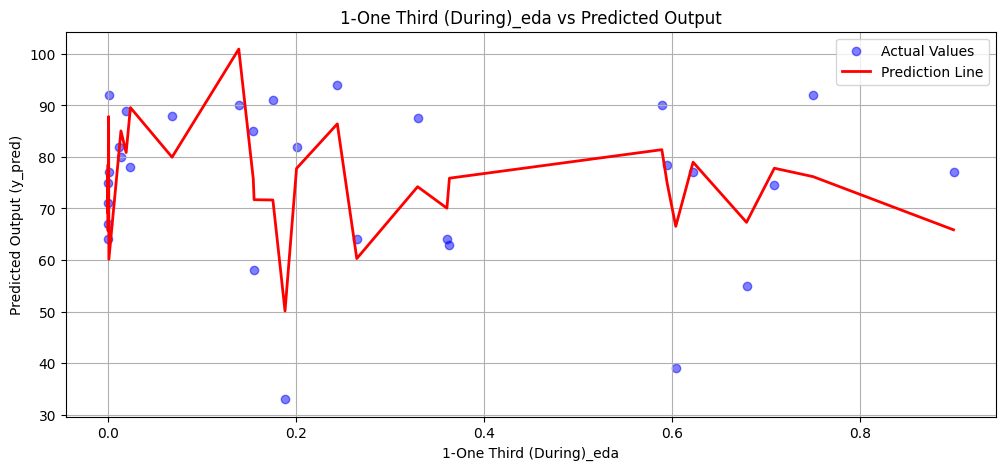

In [83]:
# Choose a feature (e.g., 'X1')
feature_name = '1-One Third (During)_eda'
X_test_feature = df_final[feature_name]  # Extract single feature from test set

# Sort values for a smooth prediction line
sorted_idx = np.argsort(X_test_feature)
X_sorted = X_test_feature.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot scatter points (original data)
plt.figure(figsize=(12, 5))
plt.scatter(X_test_feature, y, color='blue', alpha=0.5, label="Actual Values")

# Plot prediction line
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label="Prediction Line")

# Labels and title
plt.xlabel(feature_name)
plt.ylabel("Predicted Output (y_pred)")
plt.title(f"{feature_name} vs Predicted Output")
plt.grid(True)
plt.legend()
plt.show()

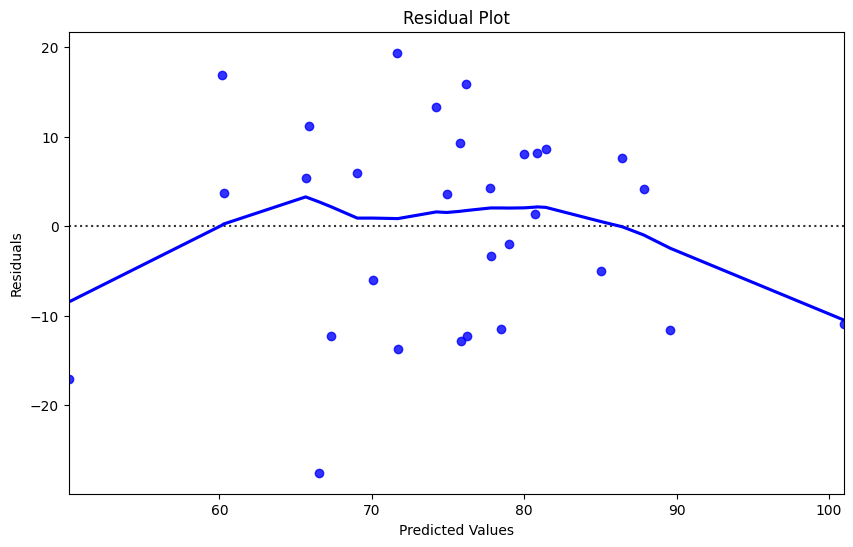

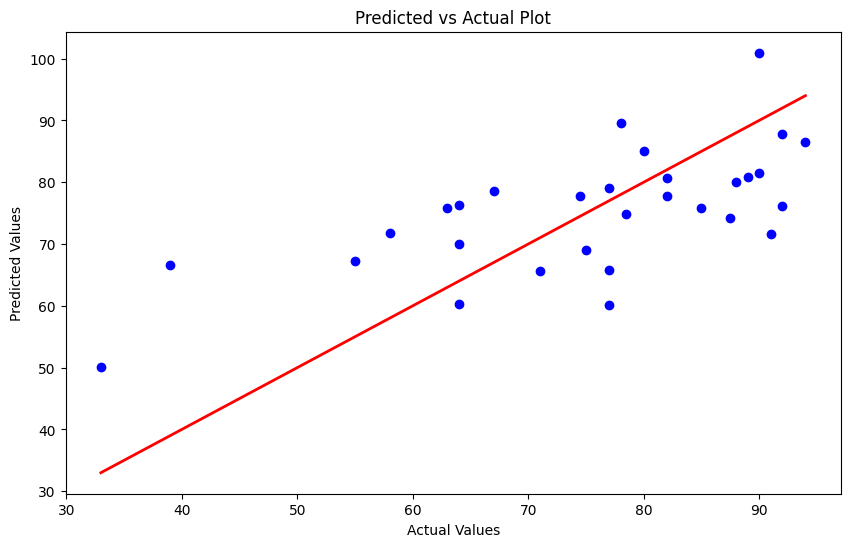

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Plot')
plt.show()